## Assignment 4: Logistic regression and multiclass classification

In this assignment you are given one of the datasets: yeast or scene.

* *Yeast* dataset: This dataset contains information about a set of Yeast cells. The task is to determine the localization site of each cell.  
  **Students whose surnames start with letter A-L should use this dataset.**  


* *Scene* dataset: This dataset contains characteristics of images and their classes. One image can belong to one or more classes.  
  **Students whose surnames start with letter M-Z should use this dataset.**  

You need to perform multiclass classifiction using the following strategies: one-vs-all, one-vs-one, error correcting codes.

In [2]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, accuracy_score

%matplotlib inline

### Exercise 1

* Load the dataset
* Apply logistic regression using one-vs-all strategy (consider each class independently, the so called binary relevance).
  * Choose regularization parameter *C* and *penalty* using cross-validation
  * Try to apply SMOTE resampling (you can use this library http://contrib.scikit-learn.org/imbalanced-learn/index.html). Make conclusion.
* Calculate performance of the classification using AUC under Precision-Recall curve (see sklearn documentation for these metrics in case of multi-label classification http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [3]:
data = np.asarray(pd.read_csv('scene.csv'))

In [4]:
x = data[:, :294]
y = data[:, 294:]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [6]:
sm = SMOTEENN()

In [7]:
n_labels_1 = 6
Cs = np.array(range(1, 50)) / 10
penalties = ['l1', 'l2']
classifier = []
bestMean_1 = np.zeros(n_labels_1)
bestC_1 = np.ones(n_labels_1) * Cs[0]
bestPenalty_1 = np.array(['l1','l1','l1','l1','l1','l1'])

In [98]:
# Searching for the best parameters
for label in range(n_labels_1):
    data = (x_train, y_train[:, label])
    data_resampled = sm.fit_sample(data[0], data[1])
    for c in Cs:
        for p in penalties:
            current_method = LogisticRegression(C=c, penalty=p)
            current_scores = cross_val_score(current_method, data_resampled[0], data_resampled[1], scoring='roc_auc')
            print(label, c, p, "Accuracy: %f (+/- %f)" % (current_scores.mean(), current_scores.std() * 2))
            if (bestMean_1[label] < current_scores.mean()):
                bestMean_1[label] = current_scores.mean()
                bestC_1[label] = c
                bestPenalty_1[label] = p      

0 0.1 l1 Accuracy: 0.936626 (+/- 0.017113)
0 0.1 l2 Accuracy: 0.952251 (+/- 0.011903)
0 0.2 l1 Accuracy: 0.948825 (+/- 0.017053)
0 0.2 l2 Accuracy: 0.958546 (+/- 0.011624)
0 0.3 l1 Accuracy: 0.952383 (+/- 0.015725)
0 0.3 l2 Accuracy: 0.961761 (+/- 0.011291)
0 0.4 l1 Accuracy: 0.955865 (+/- 0.014790)
0 0.4 l2 Accuracy: 0.963924 (+/- 0.010935)
0 0.5 l1 Accuracy: 0.959559 (+/- 0.013578)
0 0.5 l2 Accuracy: 0.965534 (+/- 0.010855)
0 0.6 l1 Accuracy: 0.961922 (+/- 0.012665)
0 0.6 l2 Accuracy: 0.966627 (+/- 0.010713)
0 0.7 l1 Accuracy: 0.963697 (+/- 0.011585)
0 0.7 l2 Accuracy: 0.967531 (+/- 0.010551)
0 0.8 l1 Accuracy: 0.965163 (+/- 0.010726)
0 0.8 l2 Accuracy: 0.968346 (+/- 0.010503)
0 0.9 l1 Accuracy: 0.966250 (+/- 0.009945)
0 0.9 l2 Accuracy: 0.969020 (+/- 0.010408)
0 1.0 l1 Accuracy: 0.967051 (+/- 0.008990)
0 1.0 l2 Accuracy: 0.969534 (+/- 0.010461)
0 1.1 l1 Accuracy: 0.967776 (+/- 0.008208)
0 1.1 l2 Accuracy: 0.970041 (+/- 0.010528)
0 1.2 l1 Accuracy: 0.968515 (+/- 0.007585)
0 1.2 l2 Ac

In [111]:
print('best C -', bestC_1)
print('best Penalty -', bestPenalty_1)

best C - [ 4.9  2.5  4.1  4.9  3.1  4.9]
best Penalty - ['l2' 'l1' 'l1' 'l2' 'l1' 'l2']


In [8]:
bestC_1 = np.array([ 4.2,  4. ,  4.7,  3.8,  4. ,  4.9])
# bestC_1 = np.ones(n_labels_1)
bestPenalty_1 = np.array(['l1', 'l1', 'l1', 'l1', 'l1', 'l1'], dtype='<U2')

In [9]:
# vector of classifiers

classifiers_1 = []
for i in range(n_labels_1):
    classifiers_1.append(LogisticRegression(C=bestC_1[i], penalty=bestPenalty_1[i]))

In [10]:
# fitting and predicting

proba_prediction_1 = np.matrix(np.zeros((x_test.shape[0], n_labels_1)))
for label in range(n_labels_1):
    print("Classifier is working", label)
    data = (x_train, y_train[:, label])
    data_resampled = sm.fit_sample(data[0], data[1])
    classifiers_1[label].fit(data_resampled[0], data_resampled[1])
    proba_prediction_1[:, label] = classifiers_1[label].predict_proba(x_test)[:, 1].reshape(-1, 1)

Classifier is working 0
Classifier is working 1
Classifier is working 2
Classifier is working 3
Classifier is working 4
Classifier is working 5


In [11]:
for label in range(n_labels_1):
    y_score = classifiers_1[label].predict(x_test)
    print ('roc_auc of class %s' % label, roc_auc_score(y_score, y_test[:, label]))

roc_auc of class 0 0.863395941278
roc_auc of class 1 0.961139097358
roc_auc of class 2 0.80686158761
roc_auc of class 3 0.869832041344
roc_auc of class 4 0.731298701299
roc_auc of class 5 0.785501892233


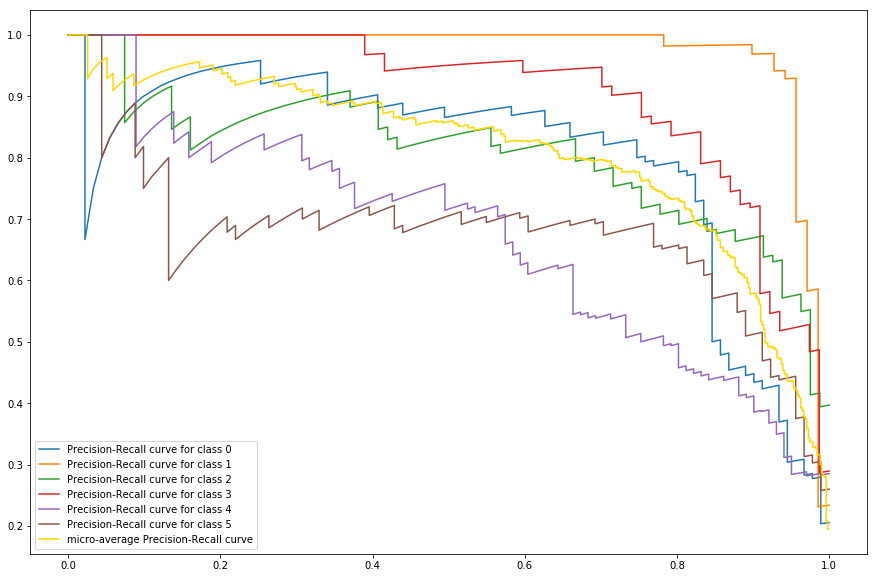

In [12]:
# Precision-Recall curves plot
precision_micro, recall_micro, _ = precision_recall_curve(y_test.ravel(), proba_prediction_1.ravel().reshape(-1, 1))
average_precision = average_precision_score(y_test, proba_prediction_1, average="micro")
plt.figure(figsize=(15, 10))
for i in range(n_labels_1):
    precision, recall, _ = precision_recall_curve(y_test[:, i], proba_prediction_1[:, i])
    plt.plot(recall, precision, label='Precision-Recall curve for class %s' % i)
        
plt.plot(recall_micro, precision_micro, color='gold', label='micro-average Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

### Exercise 2

* Apply logistic regression using one-vs-one strategy for the data set generated using code below.
* Make train/test split, use 20% of the data set for test.
  * Choose regularization parameter *C* and *penalty* using cross-validation
  * Try to apply SMOTE resampling (you can use this library http://contrib.scikit-learn.org/imbalanced-learn/index.html). Make conclusion.
* Plot Precision-Recall curve for each class and micro-averaging Precision-Recall curve.
* Calculate accuracy of the classification using test set

In [13]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
import itertools as it
X, y = make_classification(n_samples=2400, 
                           n_features=200, 
                           n_informative=200, 
                           n_redundant=0, 
                           n_classes=10, 
                           random_state=239)

# y = label_binarize(y, classes=range(9))

In [14]:
all_pairs = list(it.combinations(np.arange(0, 10), 2))

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [16]:
n_labels_2 = 10
Cs = np.array(range(1, 50)) / 10
penalties = [1, 2]
bestMean_2 = np.zeros((n_labels_2, n_labels_2))
bestC_2 = np.zeros((n_labels_2, n_labels_2))
bestPenalty_2 = np.zeros((n_labels_2, n_labels_2))

bestMean_2_SMOTE = np.zeros((n_labels_2, n_labels_2))
bestC_2_SMOTE = np.zeros((n_labels_2, n_labels_2))
bestPenalty_2_SMOTE = np.zeros((n_labels_2, n_labels_2))

In [76]:
# Searching for the best parameters

for pair in all_pairs:
    X_pair = X[np.where(np.logical_or(y == pair[0], y == pair[1]))[0]]
    y_pair = y[np.where(np.logical_or(y == pair[0], y == pair[1]))[0]]
#     y_pair_binarized = np.where(y_pair == pair[0], 1, 0)
    X_pair_resampled, y_pair_resampled = sm.fit_sample(X_pair, y_pair)
    for c in Cs:
        for p in penalties:
            current_method = LogisticRegression(C=c, penalty='l%s' % p)
            current_scores_SMOTE = cross_val_score(current_method, X_pair_resampled, y_pair_resampled)
            current_scores = cross_val_score(current_method, X_pair, y_pair)
            print(pair, c, p, "Accuracy with SMOTE: %f (+/- %f)" % (current_scores_SMOTE.mean(), 
                                                                    current_scores_SMOTE.std() * 2))
            print(pair, c, p, "Accuracy without SMOTE: %f (+/- %f)" % (current_scores.mean(), 
                                                                    current_scores.std() * 2))
            if (bestMean_2_SMOTE[pair] < current_scores_SMOTE.mean()):
                bestMean_2_SMOTE[pair] = current_scores_SMOTE.mean()
                bestC_2_SMOTE[pair] = c
                bestPenalty_2_SMOTE[pair] = p 
            if (bestMean_2[pair] < current_scores.mean()):
                bestMean_2[pair] = current_scores.mean()
                bestC_2[pair] = c
                bestPenalty_2[pair] = p  

bestC_2 = bestC_2 + bestC_2.T
bestPenalty_2 = bestPenalty_2 + bestPenalty_2.T
bestMean_2 = bestMean_2 + bestMean_2.T

bestC_2_SMOTE = bestC_2_SMOTE + bestC_2_SMOTE.T
bestPenalty_2_SMOTE = bestPenalty_2_SMOTE + bestPenalty_2_SMOTE.T
bestMean_2_SMOTE = bestMean_2_SMOTE + bestMean_2_SMOTE.T

(0, 1) 0.1 1 Accuracy with SMOTE: 0.688943 (+/- 0.058887)
(0, 1) 0.1 1 Accuracy without SMOTE: 0.695244 (+/- 0.055267)
(0, 1) 0.1 2 Accuracy with SMOTE: 0.728146 (+/- 0.037706)
(0, 1) 0.1 2 Accuracy without SMOTE: 0.684840 (+/- 0.054588)
(0, 1) 0.2 1 Accuracy with SMOTE: 0.691865 (+/- 0.038477)
(0, 1) 0.2 1 Accuracy without SMOTE: 0.691051 (+/- 0.040405)
(0, 1) 0.2 2 Accuracy with SMOTE: 0.728146 (+/- 0.027579)
(0, 1) 0.2 2 Accuracy without SMOTE: 0.684840 (+/- 0.054588)
(0, 1) 0.3 1 Accuracy with SMOTE: 0.691865 (+/- 0.038477)
(0, 1) 0.3 1 Accuracy without SMOTE: 0.695231 (+/- 0.046312)
(0, 1) 0.3 2 Accuracy with SMOTE: 0.728119 (+/- 0.012828)
(0, 1) 0.3 2 Accuracy without SMOTE: 0.684840 (+/- 0.056464)
(0, 1) 0.4 1 Accuracy with SMOTE: 0.694895 (+/- 0.046818)
(0, 1) 0.4 1 Accuracy without SMOTE: 0.693160 (+/- 0.045523)
(0, 1) 0.4 2 Accuracy with SMOTE: 0.728119 (+/- 0.012828)
(0, 1) 0.4 2 Accuracy without SMOTE: 0.684840 (+/- 0.056464)
(0, 1) 0.5 1 Accuracy with SMOTE: 0.691865 (+/- 

In [17]:
bestC_2 = np.array([[ 0. ,  0.1,  0.1,  0.2,  2.4,  1. ,  0.2,  0.9,  0.9,  0.1],
       [ 0.1,  0. ,  0.2,  0.1,  1.4,  3.6,  0.1,  0.1,  0.4,  0.4],
       [ 0.1,  0.2,  0. ,  0.1,  0.2,  0.4,  0.1,  0.1,  0.1,  0.4],
       [ 0.2,  0.1,  0.1,  0. ,  0.2,  0.1,  0.2,  0.4,  2.8,  0.1],
       [ 2.4,  1.4,  0.2,  0.2,  0. ,  0.1,  0.1,  0.1,  0.1,  0.8],
       [ 1. ,  3.6,  0.4,  0.1,  0.1,  0. ,  0.2,  0.1,  0.1,  0.1],
       [ 0.2,  0.1,  0.1,  0.2,  0.1,  0.2,  0. ,  0.1,  0.8,  0.2],
       [ 0.9,  0.1,  0.1,  0.4,  0.1,  0.1,  0.1,  0. ,  3.5,  0.3],
       [ 0.9,  0.4,  0.1,  2.8,  0.1,  0.1,  0.8,  3.5,  0. ,  0.1],
       [ 0.1,  0.4,  0.4,  0.1,  0.8,  0.1,  0.2,  0.3,  0.1,  0. ]])
bestPenalty_2 = np.array([[ 0.,  2.,  2.,  2.,  2.,  1.,  1.,  2.,  2.,  2.],
       [ 2.,  0.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  2.],
       [ 2.,  1.,  0.,  2.,  2.,  1.,  2.,  1.,  2.,  2.],
       [ 2.,  1.,  2.,  0.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  1.,  2.,  2.,  0.,  2.,  2.,  2.,  2.,  2.],
       [ 1.,  2.,  1.,  2.,  2.,  0.,  1.,  2.,  2.,  2.],
       [ 1.,  1.,  2.,  2.,  2.,  1.,  0.,  2.,  2.,  2.],
       [ 2.,  2.,  1.,  2.,  2.,  2.,  2.,  0.,  2.,  2.],
       [ 2.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  0.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  0.]])
bestC_2_SMOTE = np.array([[ 0. ,  0.6,  0.2,  0.1,  0.1,  0.1,  0.2,  0.2,  0.1,  0.1],
       [ 0.6,  0. ,  4.6,  0.1,  0.1,  0.3,  3.9,  0.2,  1.3,  0.1],
       [ 0.2,  4.6,  0. ,  0.1,  0.1,  0.1,  2.4,  0.1,  4.7,  0.1],
       [ 0.1,  0.1,  0.1,  0. ,  0.2,  1.8,  0.2,  0.5,  0.1,  0.3],
       [ 0.1,  0.1,  0.1,  0.2,  0. ,  0.9,  0.1,  0.1,  0.1,  0.1],
       [ 0.1,  0.3,  0.1,  1.8,  0.9,  0. ,  0.1,  0.1,  0.2,  0.1],
       [ 0.2,  3.9,  2.4,  0.2,  0.1,  0.1,  0. ,  1. ,  1. ,  0.1],
       [ 0.2,  0.2,  0.1,  0.5,  0.1,  0.1,  1. ,  0. ,  0.1,  0.1],
       [ 0.1,  1.3,  4.7,  0.1,  0.1,  0.2,  1. ,  0.1,  0. ,  0.1],
       [ 0.1,  0.1,  0.1,  0.3,  0.1,  0.1,  0.1,  0.1,  0.1,  0. ]])
bestPenalty_2_SMOTE = np.array([[ 0.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,  2.,  2.],
       [ 2.,  0.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  2.],
       [ 1.,  1.,  0.,  2.,  2.,  2.,  2.,  1.,  2.,  2.],
       [ 2.,  1.,  2.,  0.,  1.,  2.,  2.,  2.,  2.,  1.],
       [ 2.,  1.,  2.,  1.,  0.,  1.,  2.,  2.,  2.,  2.],
       [ 2.,  1.,  2.,  2.,  1.,  0.,  2.,  2.,  2.,  2.],
       [ 1.,  2.,  2.,  2.,  2.,  2.,  0.,  2.,  2.,  2.],
       [ 2.,  1.,  1.,  2.,  2.,  2.,  2.,  0.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  0.,  2.],
       [ 2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  0.]])

In [18]:
def fitting_classifiers(x_train=x_train, y_train=y_train, all_pairs=all_pairs, 
                  bestC_2=bestC_2, bestPenalty_2=bestPenalty_2, SMOTE=False):
    classifiers_2 = {}
    if SMOTE == True:
        for pair in all_pairs:
            X_pair = x_train[np.where(np.logical_or(y_train == pair[0], y_train == pair[1]))[0]]
            y_pair = y_train[np.where(np.logical_or(y_train == pair[0], y_train == pair[1]))[0]]
            x_pair_resampled, y_pair_resampled = sm.fit_sample(X_pair, y_pair)
            clf = LogisticRegression(C=bestC_2[pair], penalty='l%s' % int(bestPenalty_2[pair]))
#             print("Classifier (%s, %s) is working" % pair)
            clf.fit(x_pair_resampled, y_pair_resampled)
            classifiers_2[pair] = clf
    else:
        for pair in all_pairs:
            X_pair = x_train[np.where(np.logical_or(y_train == pair[0], y_train == pair[1]))[0]]
            y_pair = y_train[np.where(np.logical_or(y_train == pair[0], y_train == pair[1]))[0]]
            clf = LogisticRegression(C=bestC_2[pair], penalty='l%s' % int(bestPenalty_2[pair]))
#             print("Classifier (%s, %s) is working" % pair)
            clf.fit(X_pair, y_pair)
            classifiers_2[pair] = clf
    
    return classifiers_2

In [19]:
# fitting the classifiers (with and without SMOTE)

classifiers_2 = fitting_classifiers()
classifiers_2_SMOTE = fitting_classifiers(SMOTE=True)

In [20]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [21]:
def one_vs_one_predict(x, n_labels=10, classifiers=classifiers_2):
    x = x.reshape(1, -1)
    
    proba_matrix = np.zeros((n_labels, n_labels))
    pred_matrix = np.zeros((n_labels, n_labels))
    proba_predictions = []
    
    for pair in all_pairs:
        proba_matrix[pair] = classifiers[pair].predict_proba(x)[:, 1]
        proba_matrix[pair[1], pair[0]] = classifiers[pair].predict_proba(x)[:, 0]
        pred_matrix[pair] = classifiers[pair].predict(x)
    
#     proba_matrix = proba_matrix + proba_matrix.T
    pred_matrix = pred_matrix + pred_matrix.T
    
    predictions = np.zeros(n_labels)
    
    for i in range(10):
        proba_matrix[i, i] = 1
        pred_matrix[i, i] = i
        proba_predictions.append(softmax(proba_matrix[i, :])[i])
        predictions[i] = np.where(pred_matrix[i, :] == i)[0].shape[0]
        
    proba_predictions = np.array(proba_predictions)
    
    return np.array(proba_predictions), np.argmax(predictions)

In [22]:
def prediction(x_test, n_labels=10, SMOTE=False):
    n_samples = x_test.shape[0]
    proba_prediction = np.zeros((n_samples, n_labels))
    prediction = np.zeros(n_samples)
    for i in range(n_samples):
        if SMOTE == True:
            proba_prediction[i, :], prediction[i] = one_vs_one_predict(x_test[i], classifiers=classifiers_2_SMOTE)
        else:
            proba_prediction[i, :], prediction[i] = one_vs_one_predict(x_test[i], classifiers=classifiers_2)
    return proba_prediction, prediction

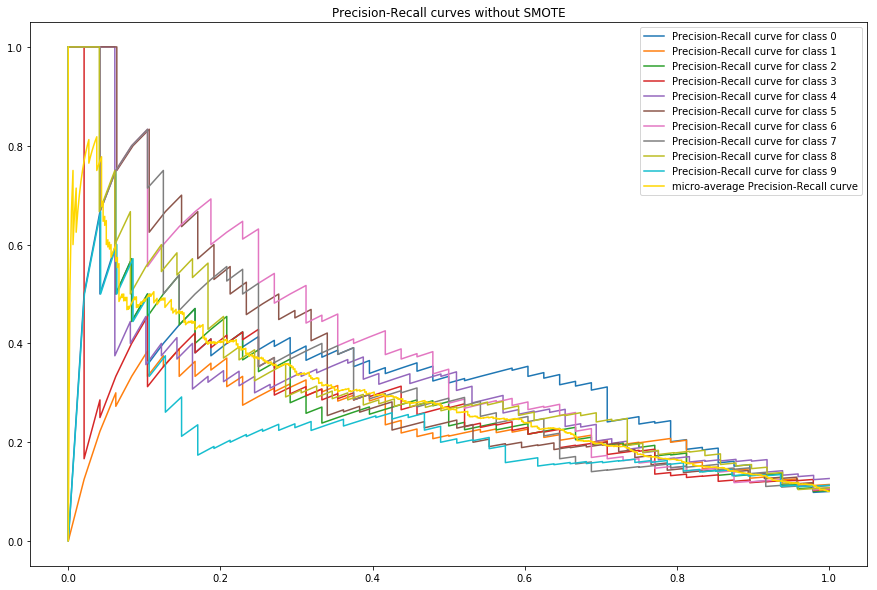

In [23]:
# Plot for fitting without SMOTE
y_test_binarized = label_binarize(y_test, classes=range(10))

precision_micro, recall_micro, _ = precision_recall_curve(y_test_binarized.ravel(), 
                                                          prediction(x_test)[0].ravel().reshape(-1, 1))
plt.figure(figsize=(15, 10))
plt.title('Precision-Recall curves without SMOTE')

for i in range(n_labels_2):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], 
                                                  prediction(x_test)[0][:, i])
    plt.plot(recall, precision, label='Precision-Recall curve for class %s' % i)

plt.plot(recall_micro, precision_micro, color='gold', label='micro-average Precision-Recall curve')
plt.legend(loc="upper right")
plt.show()

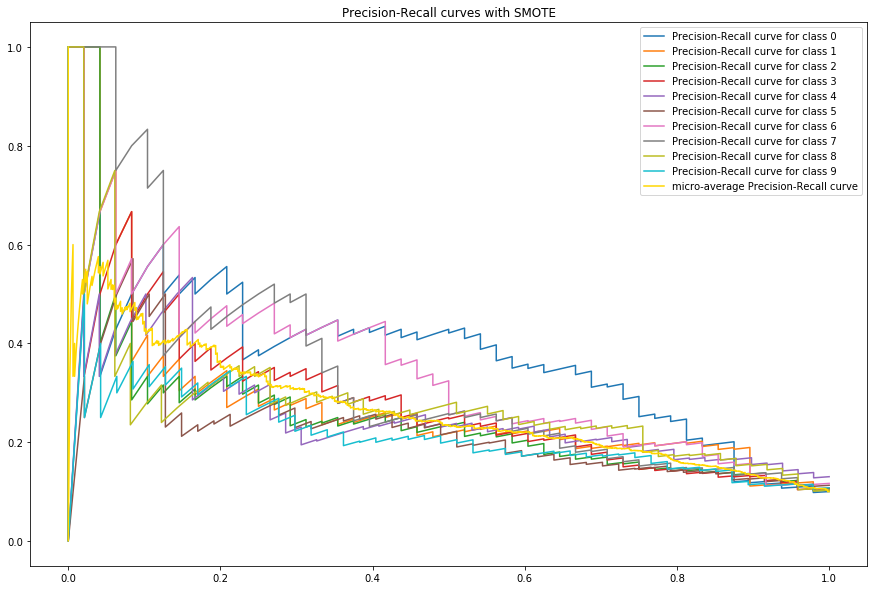

In [24]:
# Plot for fitting with SMOTE
y_test_binarized = label_binarize(y_test, classes=range(10))

precision_micro, recall_micro, _ = precision_recall_curve(y_test_binarized.ravel(), 
                                                          prediction(x_test, SMOTE=True)[0].ravel().reshape(-1, 1))
plt.figure(figsize=(15, 10))
plt.title('Precision-Recall curves with SMOTE')
for i in range(n_labels_2):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], 
                                                  prediction(x_test, SMOTE=True)[0][:, i])
    plt.plot(recall, precision, label='Precision-Recall curve for class %s' % i)

plt.plot(recall_micro, precision_micro, color='gold', label='micro-average Precision-Recall curve')
plt.legend(loc="upper right")
plt.show()

In [25]:
from sklearn.multiclass import OneVsOneClassifier

In [26]:
accuracy_of_our_OneVsOneClassifier = accuracy_score(prediction(x_test)[1], y_test)
print ('Accuracy without SMOTE=', accuracy_of_our_OneVsOneClassifier)

Accuracy without SMOTE= 0.302083333333


In [27]:
accuracy_of_our_OneVsOneClassifier_SMOTE = accuracy_score(prediction(x_test, SMOTE=True)[1], y_test)
print ('Accuracy with SMOTE=', accuracy_of_our_OneVsOneClassifier_SMOTE)

Accuracy with SMOTE= 0.285416666667


We obtain worse accuracy using SMOTE resamling

In [28]:
skmethod = OneVsOneClassifier(estimator=LogisticRegression())
skmethod.fit(x_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [29]:
accuracy_of_sklearnOneVsOneClassifier = accuracy_score(skmethod.predict(x_test), y_test)
print ('Accuracy of sklearm method =', accuracy_of_sklearnOneVsOneClassifier)

Accuracy of sklearm method = 0.291666666667


### Exercise 3

* Use the data set from exercise 2, use the same train/test split.
* Apply logistic regression using error correcting code strategy (you can use with OutputCodeClassifier in sklearn).
  * Choose parameters *C* and *penalty* using cross-validation.
* Calculate accuracy of classification on the test set.

In [30]:
from sklearn.multiclass import OutputCodeClassifier

In [31]:
from sklearn.datasets import make_classification
import itertools as it
X, y = make_classification(n_samples=2400, 
                           n_features=200, 
                           n_informative=200, 
                           n_redundant=0, 
                           n_classes=10, 
                           random_state=239)

In [113]:
Cs = np.array(range(1, 50)) / 10
penalties = ['l1', 'l2']
bestC_3 = Cs[0]
bestPenalty_3 = 'l1'
bestMean_3 = 0

for c in Cs:
    for p in penalties:
        current_scores = cross_val_score(OutputCodeClassifier(estimator=LogisticRegression(C=c, penalty=p)), 
                                         x_train, 
                                         y_train)
        print(c, p, "Accuracy: %f (+/- %f)" % (current_scores.mean(), 
                                                                    current_scores.std() * 2))
        if bestMean_3 < current_scores.mean():
            bestC_3 = c
            bestPenalty_3 = p
            bestMean_3 = current_scores.mean()

0.1 l1 Accuracy: 0.243776 (+/- 0.016751)
0.1 l2 Accuracy: 0.233893 (+/- 0.018384)
0.2 l1 Accuracy: 0.249440 (+/- 0.018402)
0.2 l2 Accuracy: 0.256826 (+/- 0.022397)
0.3 l1 Accuracy: 0.242698 (+/- 0.003966)
0.3 l2 Accuracy: 0.246426 (+/- 0.029938)
0.4 l1 Accuracy: 0.237438 (+/- 0.025208)
0.4 l2 Accuracy: 0.229697 (+/- 0.004228)
0.5 l1 Accuracy: 0.237503 (+/- 0.024343)
0.5 l2 Accuracy: 0.249466 (+/- 0.005307)
0.6 l1 Accuracy: 0.241755 (+/- 0.040591)
0.6 l2 Accuracy: 0.249079 (+/- 0.050784)
0.7 l1 Accuracy: 0.245290 (+/- 0.011122)
0.7 l2 Accuracy: 0.244837 (+/- 0.020643)
0.8 l1 Accuracy: 0.257878 (+/- 0.028911)
0.8 l2 Accuracy: 0.251065 (+/- 0.009695)
0.9 l1 Accuracy: 0.237490 (+/- 0.004544)
0.9 l2 Accuracy: 0.245918 (+/- 0.033990)
1.0 l1 Accuracy: 0.254199 (+/- 0.012896)
1.0 l2 Accuracy: 0.261979 (+/- 0.001479)
1.1 l1 Accuracy: 0.241683 (+/- 0.015304)
1.1 l2 Accuracy: 0.247405 (+/- 0.013060)
1.2 l1 Accuracy: 0.249007 (+/- 0.029892)
1.2 l2 Accuracy: 0.243731 (+/- 0.023354)
1.3 l1 Accuracy:

In [32]:
bestC_3 = 0.7
bestPenalty_3 = 'l2'

In [33]:
OCC = OutputCodeClassifier(estimator=LogisticRegression(C=bestC_3, penalty=bestPenalty_3))
OCC.fit(x_train, y_train)


OutputCodeClassifier(code_size=1.5,
           estimator=LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
           n_jobs=1, random_state=None)

In [34]:
from sklearn.preprocessing import label_binarize

In [35]:
OCC_accuracy = len(np.where((OCC.predict(x_test) == y_test) == True)[0]) / len(y_test)
print ('Accuracy =', OCC_accuracy)

Accuracy = 0.26666666666666666


### Exercise 4

* Compare models from exercise 2 and 3.
  * Make the table with the errors of all the constructed models.
* Make conclusion

In [36]:
df = pd.DataFrame([accuracy_of_our_OneVsOneClassifier, accuracy_of_our_OneVsOneClassifier_SMOTE, accuracy_of_sklearnOneVsOneClassifier, OCC_accuracy], 
               index=['Our OneVsOne', 'Our OneVsOne with SMOTE', 'Sklearn OneVsOne', 'OutputCodeClassifier'], columns=['Accuracy'])

In [37]:
df

,Accuracy
Our OneVsOne,0.302083
Our OneVsOne with SMOTE,0.285417
Sklearn OneVsOne,0.291667
OutputCodeClassifier,0.266667


We see that the best classifier is our OneVsOneClassifier where we fit logisitc regression on the non-resampling data.
Also we see that our OneVsOne with SMOTE fitting has the same result as sklearn. (Совпадение? Не думаю.)